# This demo uses dataset of raw T1 structual MRI images collected by Steve. 
# After normalization. 
# With mean value subtracted

541 subjects in total.<p>
from 6 to 85 years old.<p>
10% for test, 90% for training.<p>
Because of the incompatible in the pixdim and dim, we get rid of three images from the dataset:

- A00058503
- A00058952
- A00059344

Two images are missing according to the phenotypic information:

- A00040181
- A00039084



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from preprocess import *

## 1. The raw image

### Some images looks like this:

Dimension:  (121, 145, 121)


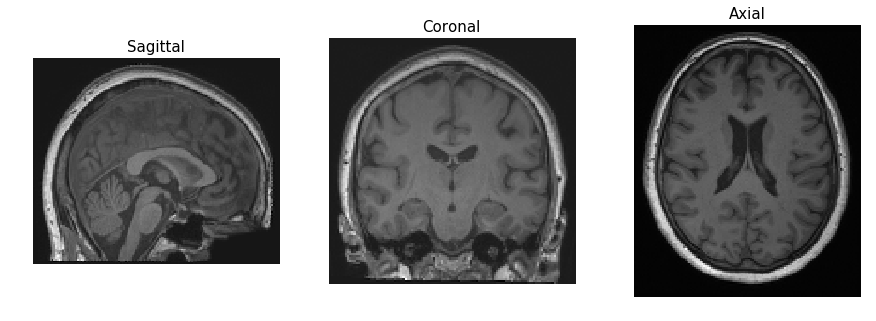

In [3]:
nii_img = nib.load('/media/woody/Elements/Steve_age_data/ANAT_normalized/A00008326.nii')
npy_img = nii_img.get_data()
print2d(npy_img)

### The mean image of all the training data is computed and is subtracted from all training and test data.
### It is worth noting that the test data does not contribute to the mean image. This is because the training data, and only training data, needs to have zero mean for better training performance.
### How does the mean values look like:

Dimension:  (121, 145, 121)


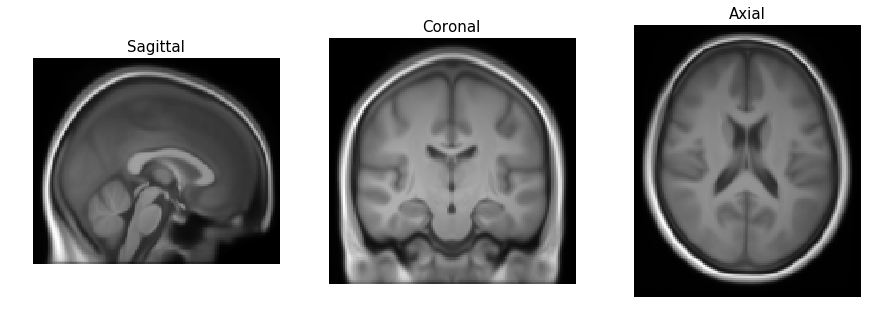

In [4]:
mean_npy = np.load('./data_npy/mean_npy.npy')
print2d(mean_npy)


### Finally, the images fed into the model look like this:

Dimension:  (121, 145, 121)


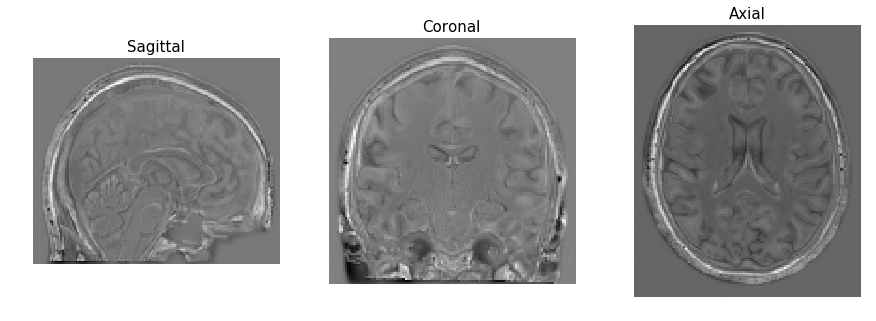

In [6]:
final_img = np.load('./data_npy/mean_subtracted/A00008326.npy')
print2d(final_img)

## 2. Training and test results
- We collect the best shot who has the smallest loss value (RMSE) in the training process.

- The validation uses the test dataset.

- Our model uses 3D-CNN with dropout, batch normalization and L2 regularization.
- Target model uses 3D-CNN with dropout.

Text(0.5, 1.0, "Target model's trainning loss")

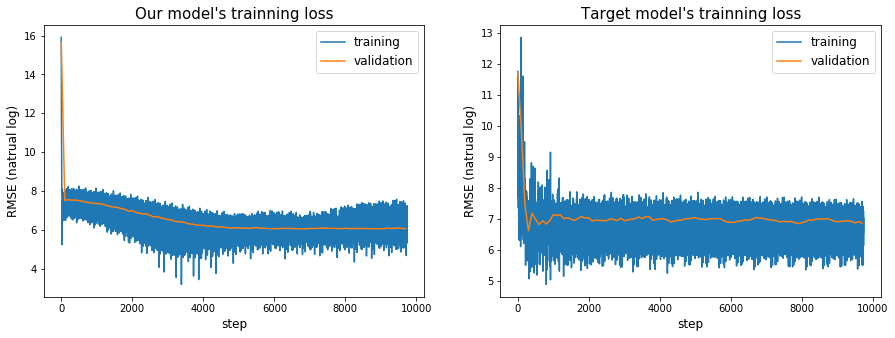

In [7]:
def subdraw(ax,filename):
    arr = np.load(filename)
    ax.plot(arr[0], np.log(arr[1]),label='training')
    ax.plot(arr[2], np.log(arr[3]),label='validation')
    ax.legend(fontsize=12)
    ax.set_xlabel('step',fontsize=12)
    ax.set_ylabel('RMSE (natrual log)',fontsize=12)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
subdraw(ax=ax1,filename='./img/demo_1_1_pltdata_2019.03.21.15:49:07.npy')
ax1.set_title('Our model\'s trainning loss',fontsize=15)
subdraw(ax=ax2,filename='./img/demo_1_2_pltdata_2019.03.21.19:07:32.npy')
ax2.set_title('Target model\'s trainning loss',fontsize=15)

### Let's check the correlation between the predicted age and the chronological age.

Text(0.5, 1.0, "Target model's test result, the correlation")

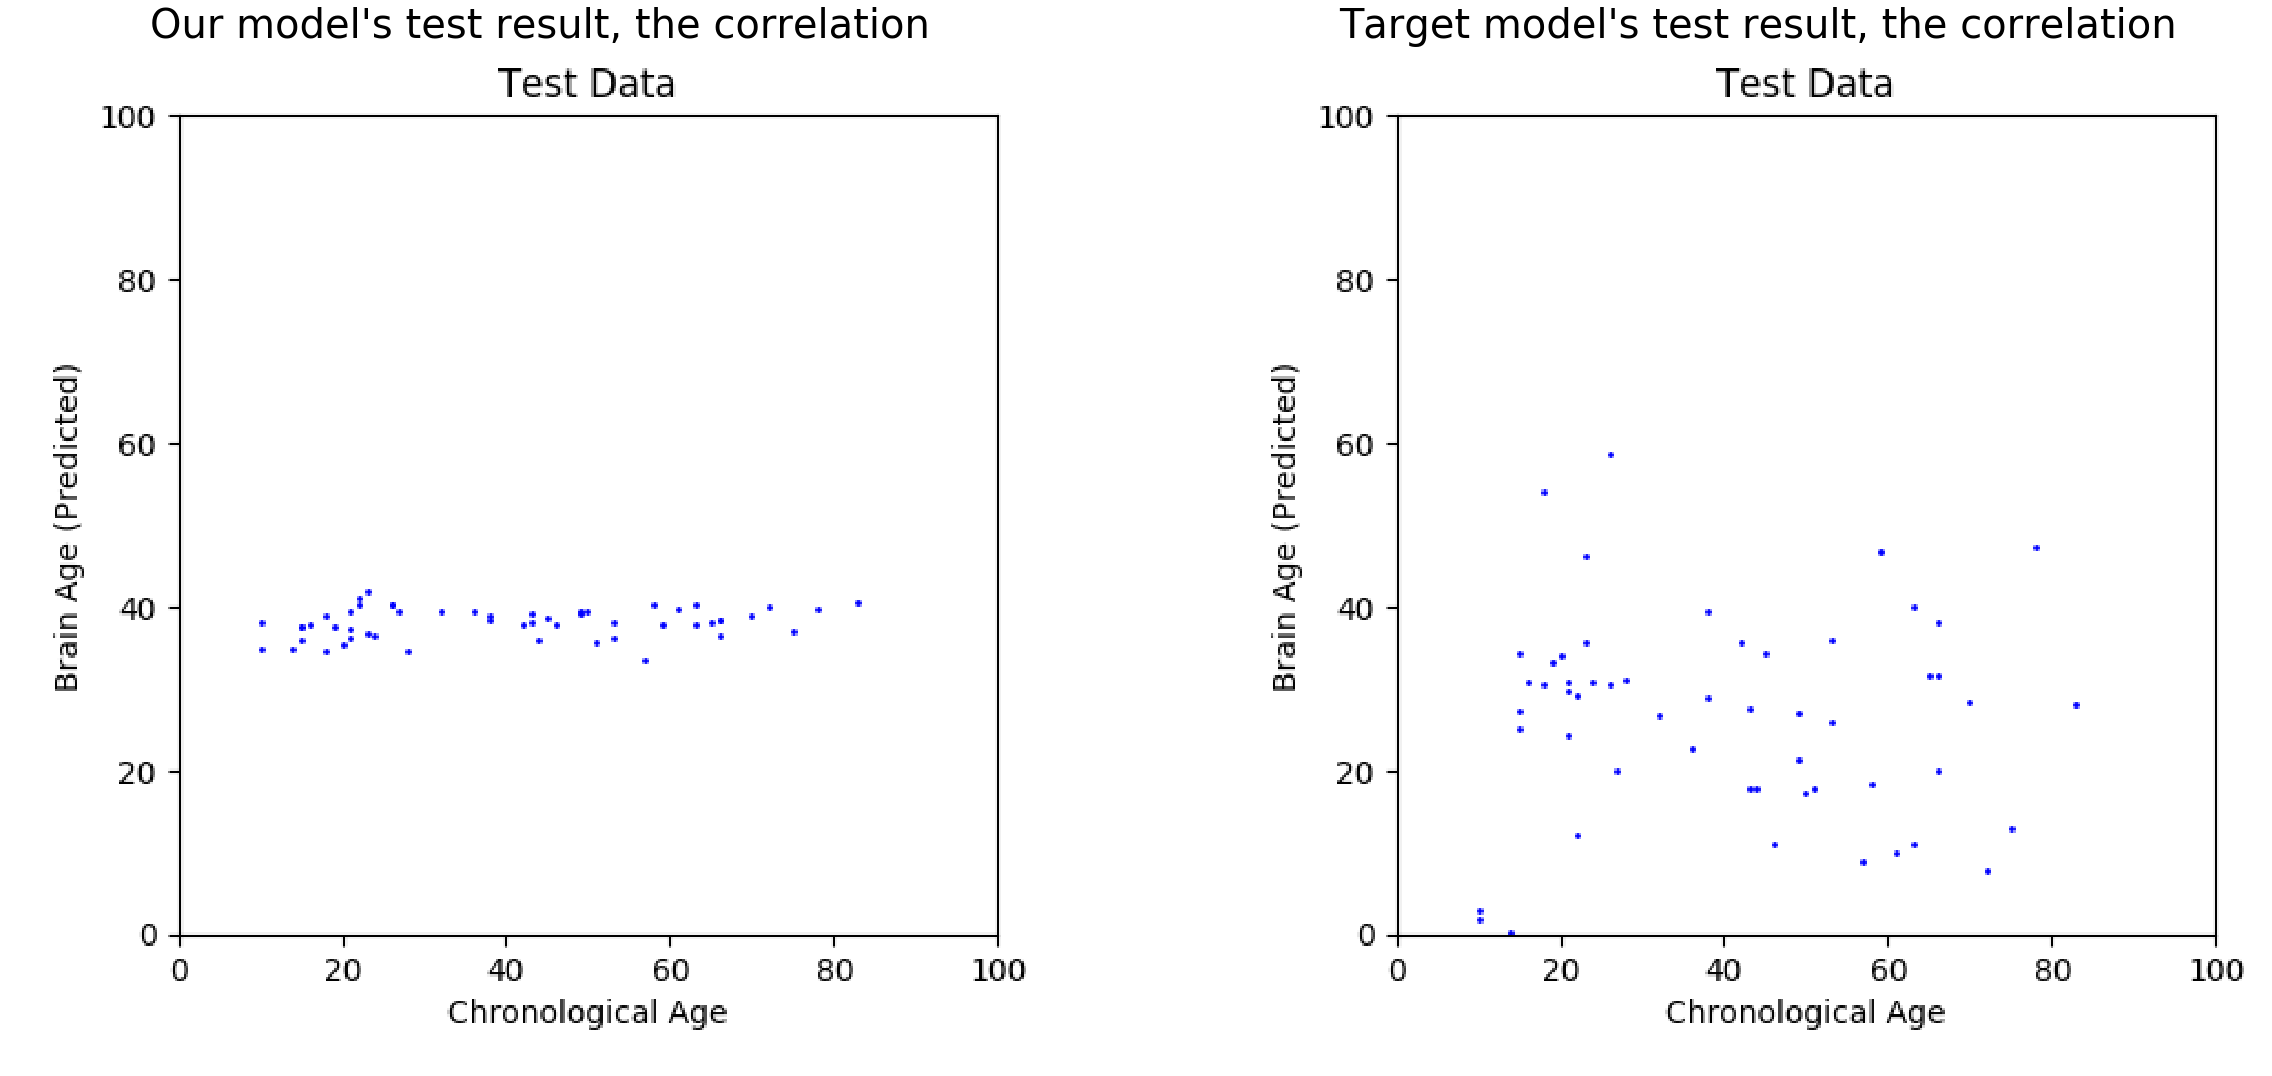

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/demo_1_1_test.png'))
ax1.axis('off')
ax1.set_title('Our model\'s test result, the correlation',fontsize=40)
ax2.imshow(plt.imread('./img/demo_1_2_test.png'))
ax2.axis('off')
ax2.set_title('Target model\'s test result, the correlation',fontsize=40)

## Guess:
### There's some possibility that in former demos the models suffer some overfitting problem. 
### Try to figure it out ...